In [ ]:
!pip3 install pandas seaborn matplotlib

In [1]:
%cd ..

/Users/hiroy/Projects/u-aizu/llm/llama2.c


/Users/hiroy/Projects/u-aizu/llm/llama2.c/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
import pandas as pd
import glob
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
csv_files = glob.glob('test/matmul_times_layer_*.csv')
# 数字だけに限定するための正規表現パターン
pattern = re.compile(r'test/matmul_times_layer_\d+\.csv')
csv_files = [file for file in csv_files if pattern.match(file)]

dfs = []
for file in csv_files:
    df = pd.read_csv(file, index_col=0)
    display(df)
    dfs.append(df)

result_df = pd.concat(dfs, axis=1)
result_df['Total Time (ms)'] = result_df.sum(axis=1)

display(result_df)

result_df.to_csv('test/total_matmul_times.csv', index=False)

,Matmul Call Time (ms)
Layer 5,
1,15.919
2,15.232
3,14.891
4,18.714
5,42.380
6,48.421
7,57.082


,Matmul Call Time (ms)
Layer 10,
1,25.164
2,15.709
3,15.435
4,26.025
5,50.536
6,52.034
7,33.594


,Matmul Call Time (ms)
Layer 11,
1,26.407
2,16.752
3,15.693
4,23.924
5,51.425
6,44.077
7,49.917


,Matmul Call Time (ms)
Layer 4,
1,14.231
2,21.288
3,14.395
4,16.303
5,47.349
6,49.936
7,47.440


,Matmul Call Time (ms)
Layer 6,
1,16.200
2,24.283
3,19.231
4,16.346
5,53.965
6,47.002
7,52.946


,Matmul Call Time (ms)
Layer 13,
1,26.201
2,16.077
3,29.340
4,14.386
5,40.852
6,47.710
7,46.036


,Matmul Call Time (ms)
Layer 12,
1,24.040
2,15.082
3,20.846
4,24.981
5,39.827
6,58.979
7,39.496


,Matmul Call Time (ms)
Layer 7,
1,16.024
2,22.101
3,24.327
4,16.110
5,54.762
6,52.144
7,49.825


,Matmul Call Time (ms)
Layer 3,
1,16.199
2,19.519
3,15.491
4,17.410
5,44.759
6,44.108
7,49.576


,Matmul Call Time (ms)
Layer 16,
1,15.206
2,16.406
3,15.144
4,25.741
5,50.365
6,51.832
7,45.298


,Matmul Call Time (ms)
Layer 17,
1,24.632
2,15.852
3,14.664
4,27.206
5,47.762
6,51.129
7,52.912


,Matmul Call Time (ms)
Layer 2,
1,19.432
2,16.544
3,16.492
4,15.838
5,45.417
6,43.932
7,44.522


,Matmul Call Time (ms)
Layer 29,
1,24.773
2,16.206
3,16.305
4,20.998
5,51.981
6,53.021
7,41.520


,Matmul Call Time (ms)
Layer 15,
1,16.570
2,16.396
3,23.615
4,15.149
5,62.272
6,87.953
7,48.776


,Matmul Call Time (ms)
Layer 14,
1,15.416
2,16.563
3,29.550
4,13.757
5,40.988
6,102.494
7,52.609


,Matmul Call Time (ms)
Layer 28,
1,16.840
2,16.014
3,20.910
4,17.145
5,53.116
6,57.306
7,49.529


,Matmul Call Time (ms)
Layer 1,
1,13.662
2,15.553
3,22.749
4,15.963
5,50.654
6,50.593
7,46.641


,Matmul Call Time (ms)
Layer 31,
1,15.261
2,15.589
3,27.550
4,16.977
5,43.961
6,51.403
7,49.614


,Matmul Call Time (ms)
Layer 25,
1,18.930
2,19.187
3,18.130
4,16.806
5,51.425
6,49.385
7,50.583


,Matmul Call Time (ms)
Layer 19,
1,19.105
2,20.894
3,16.608
4,33.353
5,39.126
6,51.243
7,50.849


,Matmul Call Time (ms)
Layer 18,
1,20.628
2,21.127
3,16.145
4,19.748
5,46.240
6,46.083
7,46.142


,Matmul Call Time (ms)
Layer 24,
1,18.576
2,15.252
3,14.996
4,19.947
5,50.520
6,48.226
7,45.719


,Matmul Call Time (ms)
Layer 30,
1,23.989
2,15.811
3,21.715
4,16.304
5,50.570
6,52.594
7,47.835


,Matmul Call Time (ms)
Layer 26,
1,19.377
2,16.036
3,19.822
4,16.454
5,45.406
6,44.367
7,50.996


,Matmul Call Time (ms)
Layer 32,
1,15.435
2,21.369
3,16.095
4,21.669
5,49.977
6,36.980
7,41.501


,Matmul Call Time (ms)
Layer 27,
1,16.858
2,20.681
3,17.485
4,21.801
5,62.824
6,50.507
7,55.292


,Matmul Call Time (ms)
Layer 23,
1,22.173
2,17.465
3,12.175
4,16.850
5,52.076
6,50.941
7,47.285


,Matmul Call Time (ms)
Layer 22,
1,19.609
2,18.955
3,14.712
4,17.632
5,34.623
6,53.689
7,41.306


,Matmul Call Time (ms)
Layer 9,
1,22.183
2,18.138
3,15.395
4,15.400
5,47.321
6,52.040
7,51.324


,Matmul Call Time (ms)
Layer 20,
1,16.540
2,21.197
3,15.529
4,19.984
5,51.924
6,48.918
7,55.450


,Matmul Call Time (ms)
Layer 21,
1,22.967
2,15.804
3,20.733
4,18.933
5,46.482
6,48.094
7,56.049


,Matmul Call Time (ms)
Layer 8,
1,16.289
2,23.812
3,15.075
4,21.646
5,40.832
6,51.621
7,52.341


,Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Matmul Call Time (ms),Total Time (ms)
1,15.919,25.164,26.407,14.231,16.200,26.201,24.040,16.024,16.199,15.206,24.632,19.432,24.773,16.570,15.416,16.840,13.662,15.261,18.930,19.105,20.628,18.576,23.989,19.377,15.435,16.858,22.173,19.609,22.183,16.540,22.967,16.289,614.836
2,15.232,15.709,16.752,21.288,24.283,16.077,15.082,22.101,19.519,16.406,15.852,16.544,16.206,16.396,16.563,16.014,15.553,15.589,19.187,20.894,21.127,15.252,15.811,16.036,21.369,20.681,17.465,18.955,18.138,21.197,15.804,23.812,576.894
3,14.891,15.435,15.693,14.395,19.231,29.340,20.846,24.327,15.491,15.144,14.664,16.492,16.305,23.615,29.550,20.910,22.749,27.550,18.130,16.608,16.145,14.996,21.715,19.822,16.095,17.485,12.175,14.712,15.395,15.529,20.733,15.075,591.243
4,18.714,26.025,23.924,16.303,16.346,14.386,24.981,16.110,17.410,25.741,27.206,15.838,20.998,15.149,13.757,17.145,15.963,16.977,16.806,33.353,19.748,19.947,16.304,16.454,21.669,21.801,16.850,17.632,15.400,19.984,18.933,21.646,619.500
5,42.380,50.536,51.425,47.349,53.965,40.852,39.827,54.762,44.759,50.365,47.762,45.417,51.981,62.272,40.988,53.116,50.654,43.961,51.425,39.126,46.240,50.520,50.570,45.406,49.977,62.824,52.076,34.623,47.321,51.924,46.482,40.832,1541.717
6,48.421,52.034,44.077,49.936,47.002,47.710,58.979,52.144,44.108,51.832,51.129,43.932,53.021,87.953,102.494,57.306,50.593,51.403,49.385,51.243,46.083,48.226,52.594,44.367,36.980,50.507,50.941,53.689,52.040,48.918,48.094,51.621,1678.762
7,57.082,33.594,49.917,47.440,52.946,46.036,39.496,49.825,49.576,45.298,52.912,44.522,41.520,48.776,52.609,49.529,46.641,49.614,50.583,50.849,46.142,45.719,47.835,50.996,41.501,55.292,47.285,41.306,51.324,55.450,56.049,52.341,1550.005


In [23]:

fin_layer_df = pd.read_csv('test/matmul_times_layer_final.csv', index_col=0)
merged_df = (pd.concat([result_df['Total Time (ms)'], fin_layer_df[' Matmul Call Time (ms)']], axis=0)
                    .reset_index(drop=True))
merged_df

0     614.836
1     576.894
2     591.243
3     619.500
4    1541.717
5    1678.762
6    1550.005
7     152.842
dtype: float64

result_df

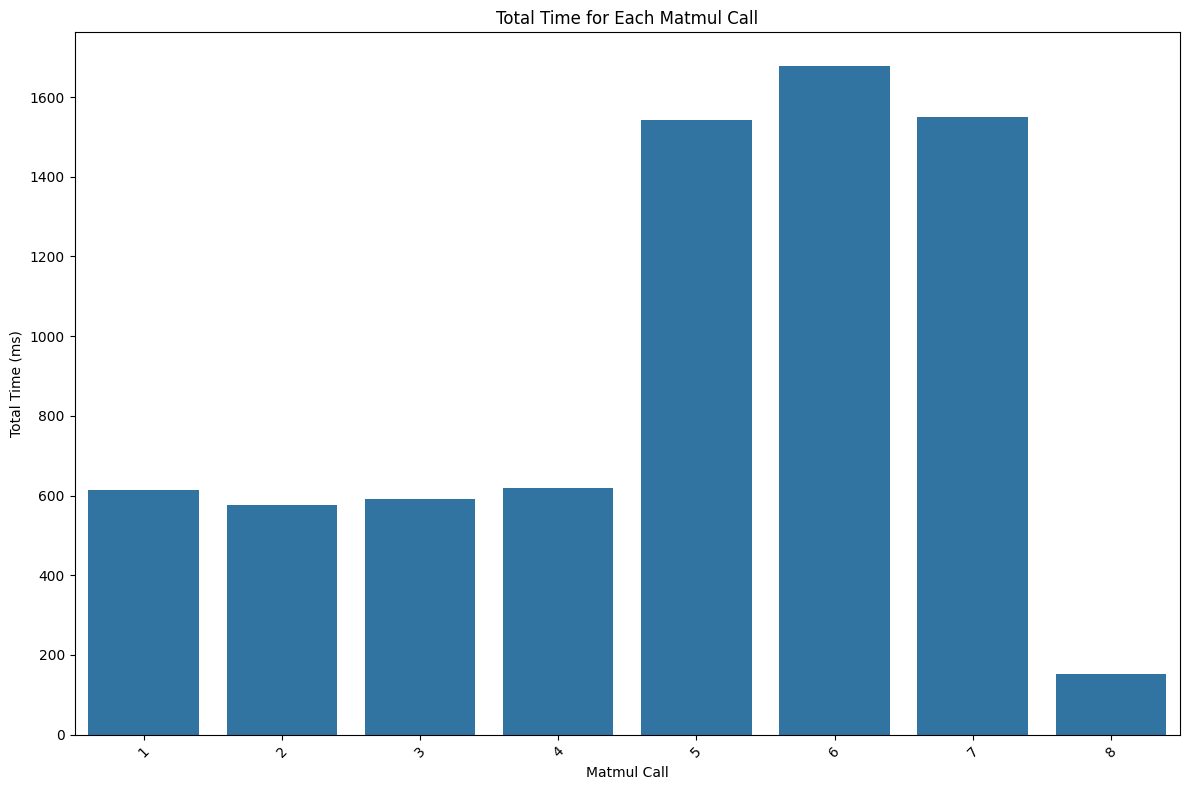

<Figure size 640x480 with 0 Axes>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.barplot(x=(merged_df.index+1), y=merged_df)
plt.xlabel('Matmul Call')
plt.ylabel('Total Time (ms)')
plt.title('Total Time for Each Matmul Call')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


plt.savefig('test/total_matmul_times.png')

### 1~4番目のmatmul: attentionの計算(Q, K, Vの内積)を行う

### 5~7番目のmatmul: attentionで計算した結果を使って、線形層での行列計算

###  -> FFN in PyTorch we have: self.w2(F.silu(self.w1(x)) * self.w3(x)) で時間がかかっている